In [125]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:

"""
Attribute Information:

The dataset consists of 10 000 data points stored as rows with 14 features in columns
UID: unique identifier ranging from 1 to 10000
product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes:
tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.
power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail
"""

"\nAttribute Information:\n\nThe dataset consists of 10 000 data points stored as rows with 14 features in columns\nUID: unique identifier ranging from 1 to 10000\nproduct ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number\nair temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K\nprocess temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.\nrotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise\ntorque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.\ntool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a\n'machine failure' label that indicates, whether the machine has failed 

In [256]:
df = pd.read_csv('ai4i2020.csv')

In [349]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [257]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [26]:
# We can perform EDA using Pandas Profile
report = ProfileReport(df)
report.to_widgets()
report.to_file('report.html')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [296]:
data = df.copy()

In [297]:
# Obesrvation from Report:
# 1. NA Values - There are no null values in dataset.
# 2. Multi Coliniarity:
#    1. Rotational speed [rpm] is negatively correlated with Torque [Nm]
# 3. Distribution - All numberic featrue some what normally distributed


In [298]:
columns = ['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']

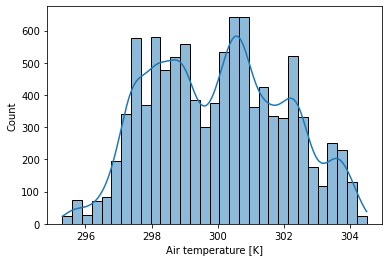

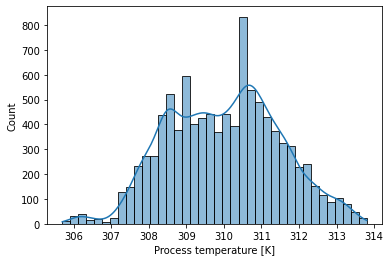

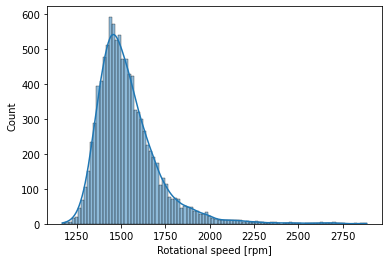

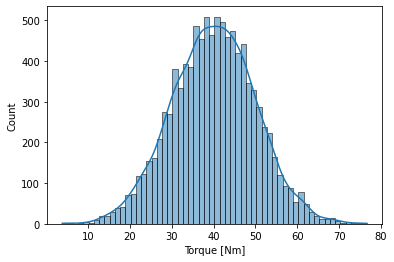

In [299]:
for column in columns:
    sns.histplot(data=data,x=data[column],kde=True)
    plt.show()

In [300]:
# Lets remove feaures UDI,ProductID as they are not usefull in prediction
data = data.drop(columns=['UDI','Product ID'],axis=1)

In [301]:
# Covert Type categorical feature into numeric using One Hot Encoding
data= pd.get_dummies(data=data,columns=['Type'],drop_first=True)

In [333]:
data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,298.1,308.6,7.346655,42.8,0,0,0,0,0,0,0,0,1
1,298.2,308.7,7.249926,46.3,3,0,0,0,0,0,0,1,0
2,298.1,308.5,7.311886,49.4,5,0,0,0,0,0,0,1,0
3,298.2,308.6,7.267525,39.5,7,0,0,0,0,0,0,1,0
4,298.2,308.7,7.249926,40.0,9,0,0,0,0,0,0,1,0


In [334]:
x=data.drop('Air temperature [K]',axis=1)
y=data['Air temperature [K]']

In [340]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [342]:
from sklearn.linear_model import LinearRegression

In [343]:
liner_model = LinearRegression()

In [344]:

liner_model.fit(x_train,y_train)

LinearRegression()

In [345]:
liner_model.score(x_train,y_train)

0.7790127657076065

In [346]:
y_pred = liner_model.predict(x_test)

In [347]:
from sklearn.metrics import r2_score

In [348]:
r2_score(y_test,y_pred)

0.7613434037813445

In [317]:
x_train

array([[ 0.43075634],
       [-0.84103188],
       [-0.06010929],
       ...,
       [-0.31112012],
       [ 0.01240496],
       [ 1.50173589]])

In [133]:
import pickle

In [135]:
pickle.dump(liner_model,open('linear_model.pickle','wb'))

In [277]:
model = pickle.load(open('linear_model.pickle','rb'))

In [278]:
model.predict([[308.6,1551,42.8,0,0,0,0,0,0,0,0,1]])

array([298.36084772])